In this homework, you will replicate the affordance learning experiments
discussed in the class. The related publication is below.

due: 08 June 2020
data@ https://www.cmpe.boun.edu.tr/~emre/courses/cmpe58y/material/hw5/

E. Ugur, E. Oztop and E. Sahin, Goal emulation and planning in
perceptual space using learned affordances, Robotics and Autonomous
Systems, 59 (7-8), pp. 580-595, 2011.
https://www.cmpe.boun.edu.tr/~emre/publications.html

pdf:
- clustering in different channels
- clusters for all-channels
- classification accuracies for different clusters
- best clusters for different behaviors
- behaviors: consider only 0 and 3
- classification: SVM
- clustering: X-means (k-means variant)

In this project there are 3 channels in the feature space.

1-Visibility of the object, 1 feature 

2-Distance of the object to edges, 6 feature

3-Shape of the object, 36 feature

İnital and effect have data of the object prior to behaviour and after the behaviour.

Here we do clustering in output(effect) set in 3 channels creating 3d cluster sets. Convert 3d clusters to 1d. Then do classification from input(initial) to cluster sets using SVM.

In [1]:
import arff, numpy as np
from sklearn.cluster import KMeans
from sklearn import svm
import matplotlib.pyplot as plt

dataset = arff.load(open('effect_3.arff', 'rt'))
effect_3 = np.array(dataset['data'])
dataset = arff.load(open('initial_3.arff', 'rt'))
initial_3 = np.array(dataset['data'])


input=initial_3
output=effect_3
CHANNELFEATURESIZES=[1,6,36]
CHANNELNO=3
FEATURENO=43
numberOfClusterList=np.zeros(3)

In [2]:
Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(output[:,0:1])
    Sum_of_squared_distances.append(km.inertia_)

<ipython-input-2-ef3c17eb0df3>:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  km = km.fit(output[:,0:1])
<ipython-input-2-ef3c17eb0df3>:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  km = km.fit(output[:,0:1])


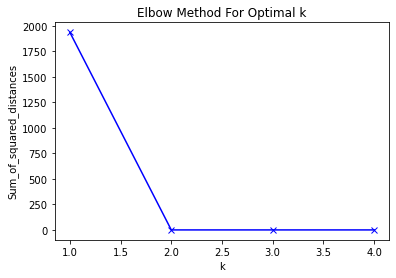

In [3]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [4]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(output[:,1:1+CHANNELFEATURESIZES[1]])
    Sum_of_squared_distances.append(km.inertia_)

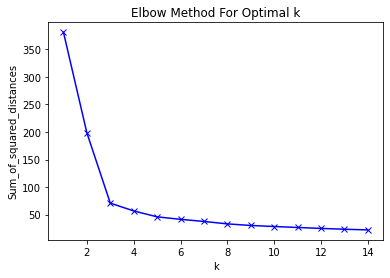

In [5]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [6]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(output[:,7:7+CHANNELFEATURESIZES[2]])
    Sum_of_squared_distances.append(km.inertia_)

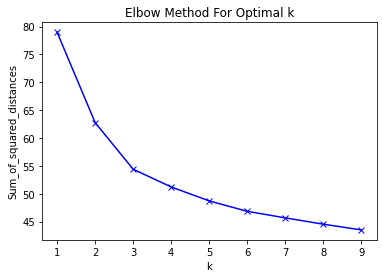

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
numberOfClusterList[0]=2
numberOfClusterList[1]=3
numberOfClusterList[2]=3
print("Cluster dimensions:",numberOfClusterList)

Cluster dimensions: [2. 3. 3.]


Selected cluster dimensions as (2,3,3) and (2,4,4) from the elbow method plots.

(2,3,3) gave %71 accuracy

(2,4,4) gave %64 accuracy

In [9]:
#Multi Channel Clustering

outputLabels=np.zeros(output.shape[0]*3).reshape(output.shape[0],3)
km = KMeans(n_clusters = (int(numberOfClusterList[0])) )
km = km.fit(output[:,0:1])
outputLabels[:,0]=km.labels_
print("Channel 0 Cluster Centers:\n", km.cluster_centers_)

km = KMeans(n_clusters = int(numberOfClusterList[1]) )
km = km.fit(output[:,1:1+6])
outputLabels[:,1]=km.labels_

print("\nChannel 1 Cluster Centers:\n", km.cluster_centers_)

km = KMeans(n_clusters = int(numberOfClusterList[2]) )
km = km.fit(output[:,7:7+36])
outputLabels[:,2]=km.labels_

print("\nChannel 2 Cluster Centers:\n", km.cluster_centers_)

print("\n3d labels:\n",outputLabels)


def clusterMappingTo1D(vector):
    x=vector[0]
    y=vector[1]
    z=vector[2] 
    return numberOfClusterList[1]*numberOfClusterList[2]*x+numberOfClusterList[2]*y+z

ClusterLabels1d=np.zeros(input.shape[0])
for i in range(input.shape[0]):
    ClusterLabels1d[i]=clusterMappingTo1D(outputLabels[i])

print("\n1d Labels:\n",ClusterLabels1d)

def clusterMappingTo3D(index):
    x=int(index/9)
    y=int(index/3) % 3
    z=index % 3
    return (x,y,z)


2.0
Channel 0 Cluster Centers:
 [[-2.97539771e-14]
 [-1.00000000e+00]]

Channel 1 Cluster Centers:
 [[ 1.89944079e-01  2.00557069e-01  6.22461059e-02  6.64604100e-02
   7.01228412e-02  7.49659103e-02]
 [-4.69761881e-03 -3.44176764e-03  5.03887153e-04  3.03903475e-04
  -1.98760670e-03 -1.12494314e-03]
 [-2.84552550e-03  1.15466289e-04  1.75454176e-01  1.84447906e-01
   9.88061405e-02  1.00553120e-01]]

Channel 2 Cluster Centers:
 [[ 6.15223841e-03 -1.23379236e-02 -1.33183743e-02 -2.86602861e-02
  -2.74650914e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.96973873e-03  1.37598570e-02
   3.00232371e-02  2.98765820e-02  8.61510124e-03  2.32805859e-02
   1.93529530e-02  4.13101176e-03 -1.49416904e-02 -2.19099641e-02
  -1.48485872e-02 -4.72371457e-03  1.34859569e-05  1.03080274e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00

In [10]:
#Supervised learning wrt to 3d clusters mapped into 1d
from skmultilearn.problem_transform.br import BinaryRelevance
from sklearn.svm import SVC

#%70 of the data is used for training
#%30 for testing
trainingSetRatio=0.7
testSetIndex=int(trainingSetRatio*11000)

# Non-linear multilabel svc
svm = SVC(kernel='rbf')
cls = BinaryRelevance(classifier=svm)
cls.fit(input[:testSetIndex], ClusterLabels1d[:testSetIndex])

errorCount=0
bigPredict=cls.predict(input)
for i in range (testSetIndex,input.shape[0]):                                                                                         
    if not bigPredict[i]==ClusterLabels1d[i]:
        errorCount+=1
print("Error no:", errorCount,"Out Of", input.shape[0]-testSetIndex )
print("Accuracy:",100-(errorCount*100/(input.shape[0]-testSetIndex)))

d:\programming apps\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3331: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


Error no: 959 Out Of 3380
Accuracy: 71.62721893491124
